# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](images/farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [61]:
# All required libraries are imported here for you.
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

features = crops.columns[0:-1]
label = crops.columns[-1]

# Write your code here
print(crops.shape)
print(features, label)
crops.head()

(2200, 5)
Index(['N', 'P', 'K', 'ph'], dtype='object') crop


,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


## Looking at the data

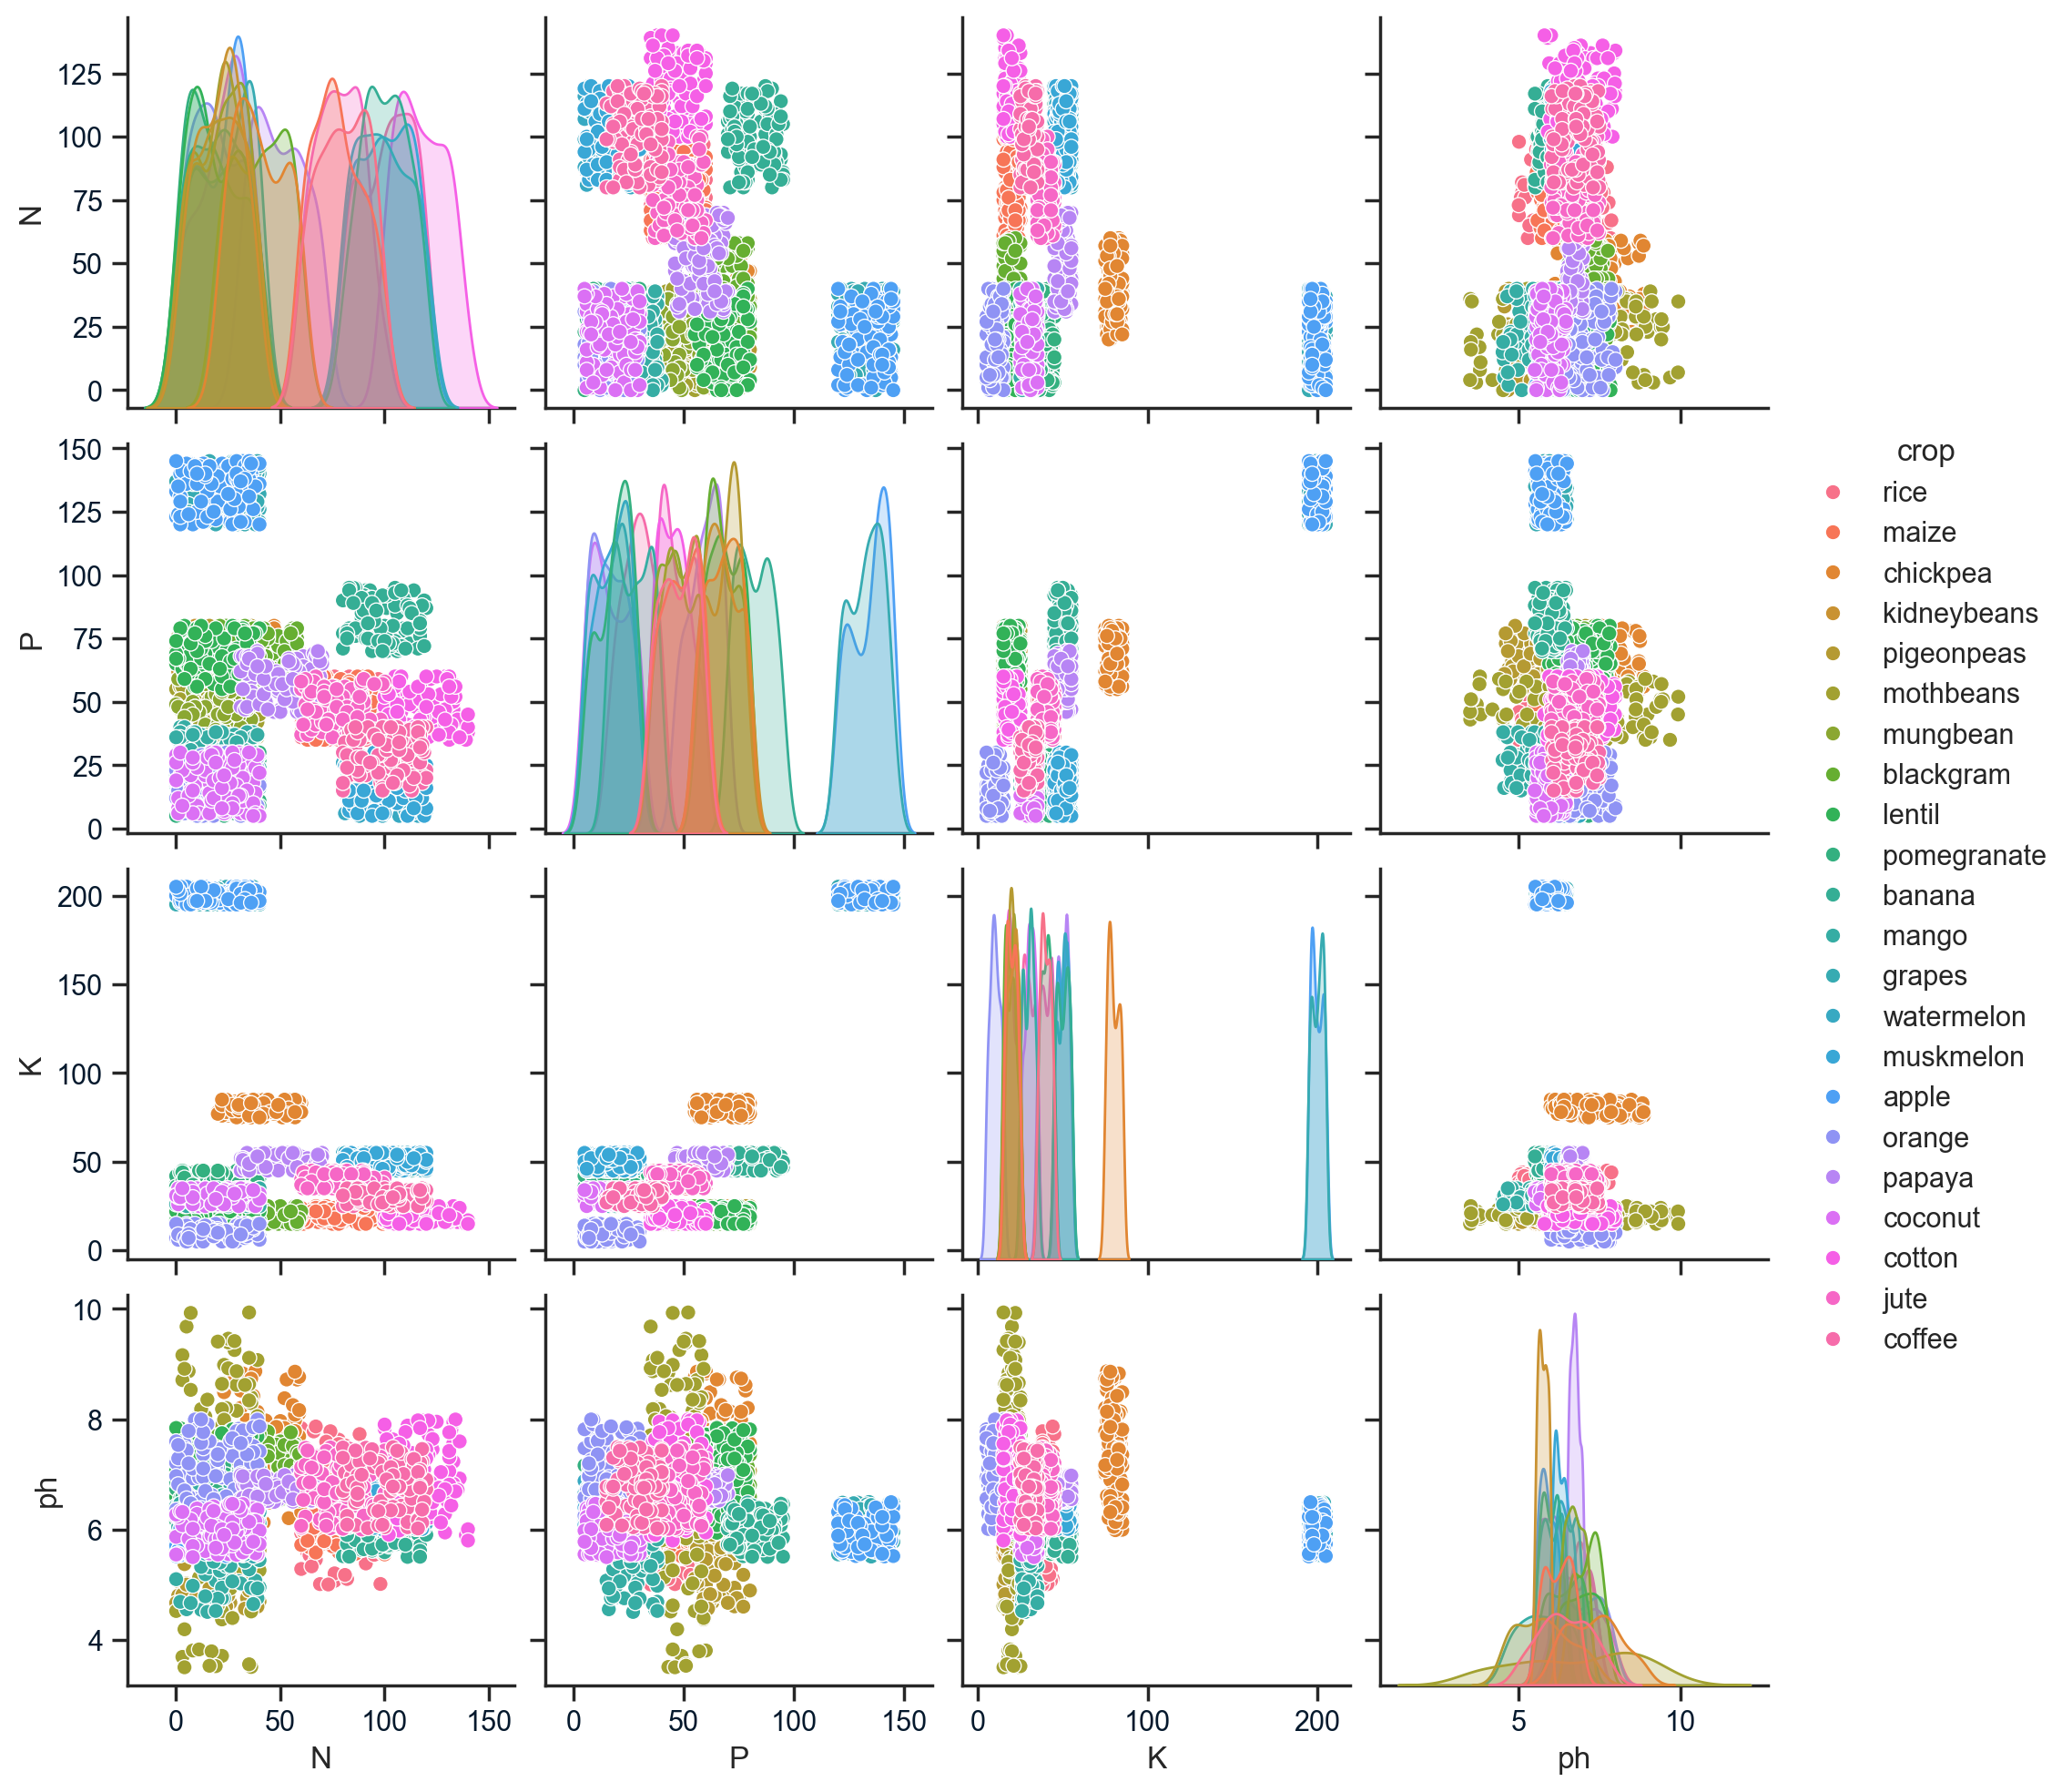

In [60]:
sns.set_theme(style="ticks")

sns.pairplot(crops, hue="crop")

## Evaluating best feature for prediction

In [53]:
def get_feature_and_label(dataset, feature_name, label_name):
    X = dataset[feature_name].values
    y = dataset[label_name].values

    X = X.reshape(-1, 1)
    return X, y

In [54]:
def evaluate_feature_prediction(X, y, n_splits=5, shuffle=True, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    reg = LogisticRegression()
    cv_scores = cross_val_score(reg, X, y, cv=kf)

    return cv_scores

In [55]:
def pipeline(dataset, label_name, n_splits=5, shuffle=True, random_state=42):
    best_score = 0
    best_feature = ''
    
    for feature_name in features:
        X, y = get_feature_and_label(dataset, feature_name, label_name)
        cv_scores = evaluate_feature_prediction(X, y)
        mean = np.mean(cv_scores)
        std = np.std(cv_scores)

        print(feature_name, mean, std)

        if best_score < mean:
            best_score = mean
            best_feature = feature_name

    return {best_feature: best_score}

In [56]:
best_predictive_feature = pipeline(dataset=crops, label_name='crop')

N 0.15272727272727274 0.011712817024295564
P 0.2040909090909091 0.014756984618861749
K 0.2922727272727273 0.008080176743014167
ph 0.08681818181818182 0.012645843402948692


In [57]:
best_predictive_feature

{'K': 0.2922727272727273}